In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
requests.__path__

['/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [3]:
url = "https://www.pro-football-reference.com/"
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
page = response.text

In [6]:
nfl_soup = BeautifulSoup(page, "html")
#print(nfl_soup.prettify())
#print(nfl_soup)

In [7]:
len(nfl_soup.find_all('a'))

478

In [8]:
nfl_teams_set = set(link["href"] for link in nfl_soup.find_all('a') if "teams" in str(link))

#remove dups
nfl_teams_list = list(nfl_teams_set)
nfl_teams_list[:10]


['/teams/car/2018.htm',
 '/teams/crd/2019.htm',
 '/teams/buf/2018.htm',
 '/teams/ram/2018.htm',
 '/teams/den/2019.htm',
 '/teams/sdg/2018.htm',
 '/teams/dal/2018.htm',
 '/teams/rai/2018.htm',
 '/teams/atl/2018.htm',
 '/teams/nwe/2018.htm']

In [9]:
nfl_team_links = []
for ele in nfl_teams_list:
    if ele[-5] == '8':
        nfl_team_links.append(ele)
        #nfl_teams_list.remove(ele)
nfl_team_links

['/teams/car/2018.htm',
 '/teams/buf/2018.htm',
 '/teams/ram/2018.htm',
 '/teams/sdg/2018.htm',
 '/teams/dal/2018.htm',
 '/teams/rai/2018.htm',
 '/teams/atl/2018.htm',
 '/teams/nwe/2018.htm',
 '/teams/nyj/2018.htm',
 '/teams/clt/2018.htm',
 '/teams/cle/2018.htm',
 '/teams/jax/2018.htm',
 '/teams/nyg/2018.htm',
 '/teams/tam/2018.htm',
 '/teams/cin/2018.htm',
 '/teams/pit/2018.htm',
 '/teams/crd/2018.htm',
 '/teams/nor/2018.htm',
 '/teams/kan/2018.htm',
 '/teams/den/2018.htm',
 '/teams/mia/2018.htm',
 '/teams/phi/2018.htm',
 '/teams/was/2018.htm',
 '/teams/chi/2018.htm',
 '/teams/det/2018.htm',
 '/teams/rav/2018.htm',
 '/teams/oti/2018.htm',
 '/teams/min/2018.htm',
 '/teams/sea/2018.htm',
 '/teams/htx/2018.htm',
 '/teams/sfo/2018.htm',
 '/teams/gnb/2018.htm']

In [10]:
print(nfl_team_links)

['/teams/car/2018.htm', '/teams/buf/2018.htm', '/teams/ram/2018.htm', '/teams/sdg/2018.htm', '/teams/dal/2018.htm', '/teams/rai/2018.htm', '/teams/atl/2018.htm', '/teams/nwe/2018.htm', '/teams/nyj/2018.htm', '/teams/clt/2018.htm', '/teams/cle/2018.htm', '/teams/jax/2018.htm', '/teams/nyg/2018.htm', '/teams/tam/2018.htm', '/teams/cin/2018.htm', '/teams/pit/2018.htm', '/teams/crd/2018.htm', '/teams/nor/2018.htm', '/teams/kan/2018.htm', '/teams/den/2018.htm', '/teams/mia/2018.htm', '/teams/phi/2018.htm', '/teams/was/2018.htm', '/teams/chi/2018.htm', '/teams/det/2018.htm', '/teams/rav/2018.htm', '/teams/oti/2018.htm', '/teams/min/2018.htm', '/teams/sea/2018.htm', '/teams/htx/2018.htm', '/teams/sfo/2018.htm', '/teams/gnb/2018.htm']


In [11]:
len(nfl_team_links)

32

In [12]:
for idx, second_half_url in enumerate(nfl_team_links):
    nfl_team_links[idx] = "https://www.pro-football-reference.com" + second_half_url
nfl_team_links

['https://www.pro-football-reference.com/teams/car/2018.htm',
 'https://www.pro-football-reference.com/teams/buf/2018.htm',
 'https://www.pro-football-reference.com/teams/ram/2018.htm',
 'https://www.pro-football-reference.com/teams/sdg/2018.htm',
 'https://www.pro-football-reference.com/teams/dal/2018.htm',
 'https://www.pro-football-reference.com/teams/rai/2018.htm',
 'https://www.pro-football-reference.com/teams/atl/2018.htm',
 'https://www.pro-football-reference.com/teams/nwe/2018.htm',
 'https://www.pro-football-reference.com/teams/nyj/2018.htm',
 'https://www.pro-football-reference.com/teams/clt/2018.htm',
 'https://www.pro-football-reference.com/teams/cle/2018.htm',
 'https://www.pro-football-reference.com/teams/jax/2018.htm',
 'https://www.pro-football-reference.com/teams/nyg/2018.htm',
 'https://www.pro-football-reference.com/teams/tam/2018.htm',
 'https://www.pro-football-reference.com/teams/cin/2018.htm',
 'https://www.pro-football-reference.com/teams/pit/2018.htm',
 'https:

In [13]:
print(nfl_team_links[0], type(nfl_team_links[0]))

https://www.pro-football-reference.com/teams/car/2018.htm <class 'str'>


In [14]:
url = 'https://www.pro-football-reference.com/teams/sdg/2018.htm'
response = requests.get(url)
response.status_code

200

In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import chromedriver_binary

## Let's get a few years of data

In [16]:
def year(digit):
    new_year_links = []
    for link in nfl_team_links:
        new_year_links.append(link.replace('8', digit))
    return(new_year_links)
    

In [17]:
nfl_team_links=nfl_team_links+year('7')+year('6')+year('5')
nfl_team_links

['https://www.pro-football-reference.com/teams/car/2018.htm',
 'https://www.pro-football-reference.com/teams/buf/2018.htm',
 'https://www.pro-football-reference.com/teams/ram/2018.htm',
 'https://www.pro-football-reference.com/teams/sdg/2018.htm',
 'https://www.pro-football-reference.com/teams/dal/2018.htm',
 'https://www.pro-football-reference.com/teams/rai/2018.htm',
 'https://www.pro-football-reference.com/teams/atl/2018.htm',
 'https://www.pro-football-reference.com/teams/nwe/2018.htm',
 'https://www.pro-football-reference.com/teams/nyj/2018.htm',
 'https://www.pro-football-reference.com/teams/clt/2018.htm',
 'https://www.pro-football-reference.com/teams/cle/2018.htm',
 'https://www.pro-football-reference.com/teams/jax/2018.htm',
 'https://www.pro-football-reference.com/teams/nyg/2018.htm',
 'https://www.pro-football-reference.com/teams/tam/2018.htm',
 'https://www.pro-football-reference.com/teams/cin/2018.htm',
 'https://www.pro-football-reference.com/teams/pit/2018.htm',
 'https:

In [18]:
pass
    

## Try Selenium with just the Chargers

In [19]:
driver = webdriver.Chrome()
driver.get(url)

In [20]:
soup_selenium = BeautifulSoup(driver.page_source)

In [21]:
chargers_df = pd.read_html(str(soup_selenium.find(id='rushing_and_receiving')))[0]
chargers_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                 No.             Player                Age                Pos   
0               28.0     Melvin Gordon*               25.0                 RB   
1               30.0      Austin Ekeler               23.0                 rb   
2               32.0     Justin Jackson               23.0                 rb   
3               17.0     Philip Rivers*               37.0                 QB   
4               38.0     Detrez Newsome               24.0                NaN   

  Games       Rushing                 ... Receiving                           \
      G    GS     Att  Yds  TD   Lng  ...       Lng  R/G   Y/G   Ctch% Y/Tgt   
0    12  12.0     175  885  10  34.0  ...      66.0  4.2  40.8   75.8%   7.4   
1    14   3.0     106  554   3  41.0  ...      44.0  2.8  28.9   73.6%   7.6   
2    13   1.0      50  206   2  20.0  ...      19.0  1.2  10.4   78.9%   7.1   
3    16  16.0      18    7   0   7.0  ...       NaN  NaN   NaN     NaN   NaN   
4     9   0.0      11   49   0  16.0  ...      11.0  0.2   2.1  100.0%   9.5   

  Total Yds             Unnamed: 26_level_0 Unnamed: 27_level_0  
      Touch Y/Tch  YScm                RRTD                 Fmb  
0     225.0   6.1  1375                  14                   1  
1     145.0   6.6   958                   6                   1  
2      65.0   5.2   341                   2                   0  
3      18.0   0.4     7                   0                   2  
4      13.0   5.2    68                   0                   0  

[5 rows x 28 columns]

In [22]:
driver.quit()

In [23]:
chargers_df.columns = ['No','Player','Age','Pos','G','GS','Att','Rush_Yds','Rush_TD','Lng_Rush',
                       'Y/A','Rush_Y/G','A/G','Tgt','Rec','Rec_Yds','Y/R','Rec_TD','Lng_Rec','R/G',
                       'Rec_Y/G','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb']
chargers_df

No           Player   Age     Pos   G    GS  Att  Rush_Yds  Rush_TD  \
0   28.0   Melvin Gordon*  25.0      RB  12  12.0  175       885       10   
1   30.0    Austin Ekeler  23.0      rb  14   3.0  106       554        3   
2   32.0   Justin Jackson  23.0      rb  13   1.0   50       206        2   
3   17.0   Philip Rivers*  37.0      QB  16  16.0   18         7        0   
4   38.0   Detrez Newsome  24.0     NaN   9   0.0   11        49        0   
5   13.0    Keenan Allen*  26.0      WR  16  14.0    9        75        0   
6    3.0       Geno Smith  28.0     NaN   5   0.0    8         2        0   
7   81.0    Mike Williams  24.0      wr  16   5.0    7        28        1   
8   12.0  Travis Benjamin  29.0      wr  12   3.0    7        41        0   
9   34.0       Derek Watt  26.0      fb  16   5.0    4        11        0   
10  16.0  Tyrell Williams  26.0  lcb/wr  16  10.0    2        15        0   
11  54.0   Melvin Ingram*  29.0      DE  16  16.0    1         0        0   
12  89.0         JJ Jones  26.0     NaN   3   0.0    1         0        0   
13  85.0    Antonio Gates  38.0      te  16   1.0    0         0        0   
14  88.0     Virgil Green  30.0      TE  16  16.0    0         0        0   
15  80.0      Sean Culkin  25.0      TE  13  10.0    0         0        0   
16   NaN       Team Total  26.2     NaN  16   NaN  399      1873       16   
17   NaN        Opp Total   NaN     NaN  16   NaN  395      1693       11   

    Lng_Rush  ...  Lng_Rec   R/G  Rec_Y/G   Ctch%  Y/Tgt  Touch  Y/Tch  YScm  \
0       34.0  ...     66.0   4.2     40.8   75.8%    7.4  225.0    6.1  1375   
1       41.0  ...     44.0   2.8     28.9   73.6%    7.6  145.0    6.6   958   
2       20.0  ...     19.0   1.2     10.4   78.9%    7.1   65.0    5.2   341   
3        7.0  ...      NaN   NaN      NaN     NaN    NaN   18.0    0.4     7   
4       16.0  ...     11.0   0.2      2.1  100.0%    9.5   13.0    5.2    68   
5       28.0  ...     54.0   6.1     74.8   71.3%    8.8  106.0   12.0  1271   
6        9.0  ...      NaN   NaN      NaN     NaN    NaN    8.0    0.3     2   
7       19.0  ...     55.0   2.7     41.5   65.2%   10.1   50.0   13.8   692   
8       19.0  ...     46.0   1.0     15.5   50.0%    7.8   19.0   11.9   227   
9        8.0  ...      2.0   0.1      0.1  100.0%    2.0    5.0    2.6    13   
10      14.0  ...     75.0   2.6     40.8   63.1%   10.0   43.0   15.5   668   
11       0.0  ...      NaN   NaN      NaN     NaN    NaN    1.0    0.0     0   
12       0.0  ...      NaN   NaN      NaN     NaN    NaN    1.0    0.0     0   
13       0.0  ...     27.0   1.8     20.8   62.2%    7.4   28.0   11.9   333   
14       0.0  ...     26.0   1.2     13.1   70.4%    7.8   19.0   11.1   210   
15       0.0  ...     24.0   0.1      1.8  100.0%   24.0    1.0   24.0    24   
16      41.0  ...     75.0  21.8    269.8   68.8%    NaN  747.0    8.3  6189   
17       NaN  ...      NaN  21.9    227.9     NaN    NaN    NaN    NaN  5339   

    RRTD  Fmb  
0     14    1  
1      6    1  
2      2    0  
3      0    2  
4      0    0  
5      6    3  
6      0    1  
7     11    0  
8      1    0  
9      0    0  
10     5    2  
11     0    1  
12     0    2  
13     2    1  
14     1    0  
15     0    0  
16    48   17  
17    34   18  

[18 rows x 28 columns]

## Selenium for all the team links

In [24]:
df_columns = ['No','Player','Age','Pos','G','GS','Att','Rush_Yds','Rush_TD','Lng_Rush',
                       'Y/A','Rush_Y/G','A/G','Tgt','Rec','Rec_Yds','Y/R','Rec_TD','Lng_Rec','R/G',
                       'Rec_Y/G','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb']

In [25]:
#maybe dont need this.
team_abbrev = []
for team in nfl_team_links:
    team_abbrev.append(team[-12:-9])
print(team_abbrev)

['car', 'buf', 'ram', 'sdg', 'dal', 'rai', 'atl', 'nwe', 'nyj', 'clt', 'cle', 'jax', 'nyg', 'tam', 'cin', 'pit', 'crd', 'nor', 'kan', 'den', 'mia', 'phi', 'was', 'chi', 'det', 'rav', 'oti', 'min', 'sea', 'htx', 'sfo', 'gnb', 'car', 'buf', 'ram', 'sdg', 'dal', 'rai', 'atl', 'nwe', 'nyj', 'clt', 'cle', 'jax', 'nyg', 'tam', 'cin', 'pit', 'crd', 'nor', 'kan', 'den', 'mia', 'phi', 'was', 'chi', 'det', 'rav', 'oti', 'min', 'sea', 'htx', 'sfo', 'gnb', 'car', 'buf', 'ram', 'sdg', 'dal', 'rai', 'atl', 'nwe', 'nyj', 'clt', 'cle', 'jax', 'nyg', 'tam', 'cin', 'pit', 'crd', 'nor', 'kan', 'den', 'mia', 'phi', 'was', 'chi', 'det', 'rav', 'oti', 'min', 'sea', 'htx', 'sfo', 'gnb', 'car', 'buf', 'ram', 'sdg', 'dal', 'rai', 'atl', 'nwe', 'nyj', 'clt', 'cle', 'jax', 'nyg', 'tam', 'cin', 'pit', 'crd', 'nor', 'kan', 'den', 'mia', 'phi', 'was', 'chi', 'det', 'rav', 'oti', 'min', 'sea', 'htx', 'sfo', 'gnb']


In [26]:
def df_for_each_team(team_url):
    driver = webdriver.Chrome()
    driver.get(team_url)
    soup_selenium = BeautifulSoup(driver.page_source)
    df_each_team = pd.read_html(str(soup_selenium.find(id='rushing_and_receiving')))[0]
    df_each_team.columns = df_columns
    driver.quit()
    return(df_each_team)

In [27]:
#Make a blank DF to concat in teams loop
df = pd.DataFrame(columns=df_columns)
df

Empty DataFrame
Columns: [No, Player, Age, Pos, G, GS, Att, Rush_Yds, Rush_TD, Lng_Rush, Y/A, Rush_Y/G, A/G, Tgt, Rec, Rec_Yds, Y/R, Rec_TD, Lng_Rec, R/G, Rec_Y/G, Ctch%, Y/Tgt, Touch, Y/Tch, YScm, RRTD, Fmb]
Index: []

[0 rows x 28 columns]

In [28]:
#Union all the teams' tables together
for team in nfl_team_links:
    df = df.append(df_for_each_team(team))

In [29]:
df.reset_index(inplace=True)

In [30]:
df

index    No               Player   Age    Pos   G    GS  Att Rush_Yds  \
0         0  22.0  Christian McCaffrey  22.0     RB  16  16.0  219     1098   
1         1   1.0           Cam Newton  29.0     QB  14  14.0  101      488   
2         2  20.0        C.J. Anderson  27.0     rb   9   1.0   24      104   
3         3  34.0  Cameron Artis-Payne  28.0    NaN   9   0.0   19       69   
4         4  12.0           D.J. Moore  21.0     WR  16  10.0   13      172   
5         5  38.0       Travaris Cadet  29.0    NaN   1   0.0   11       17   
6         6  40.0           Alex Armah  24.0  fb/wr  16   2.0    9       15   
7         7  10.0        Curtis Samuel  22.0     WR  13   8.0    8       84   
8         8   7.0           Kyle Allen  22.0     qb   2   1.0    5       19   
9         9   6.0      Taylor Heinicke  25.0     qb   6   1.0    5       31   
10       10  13.0        Jarius Wright  29.0  fb/wr  16   6.0    2       39   
11       11  17.0       Devin Funchess  24.0     WR  14  12.0    0        0   
12       12  80.0           Ian Thomas  22.0     te  16   6.0    0        0   
13       13  88.0           Greg Olsen  33.0     TE   9   9.0    0        0   
14       14  11.0         Torrey Smith  29.0     wr  11   6.0    0        0   
15       15  82.0       Chris Manhertz  26.0     te  16   4.0    0        0   
16       16  23.0        Kenjon Barner  28.0    NaN   4   0.0    0        0   
17       17  18.0         Damiere Byrd  25.0    NaN   8   0.0    0        0   
18       18   NaN           Team Total  27.0    NaN  16   NaN  416     2136   
19       19   NaN            Opp Total   NaN    NaN  16   NaN  384     1804   
20        0  25.0         LeSean McCoy  30.0     RB  14  13.0  161      514   
21        1  33.0          Chris Ivory  30.0     rb  13   1.0  115      385   
22        2  17.0           Josh Allen  22.0     QB  12  11.0   89      631   
23        3  45.0        Marcus Murphy  27.0     rb  11   1.0   52      250   
24        4  35.0           Keith Ford  24.0     rb   2   1.0   21       79   
25        5  19.0      Isaiah McKenzie  23.0     wr   7   1.0   10       66   
26        6   2.0      Nathan Peterman  24.0     qb   4   2.0   10       50   
27        7   5.0         Matt Barkley  28.0     qb   1   1.0    3       -2   
28        8  14.0      Ray-Ray McCloud  22.0     fb  10   1.0    2        4   
29        9  11.0            Zay Jones  23.0     WR  16  15.0    1        0   
...     ...   ...                  ...   ...    ...  ..   ...  ...      ...   
2552     15  82.0         Torrey Smith  26.0     WR  16  12.0    0        0   
2553     16  89.0       Vance McDonald  25.0  TE/wr  14  11.0    0        0   
2554     17  88.0        Garrett Celek  27.0     TE  11   8.0    0        0   
2555     18  85.0         Vernon Davis  31.0     te   6   5.0    0        0   
2556     19  84.0           Blake Bell  24.0     te  14   5.0    0        0   
2557     20  14.0       Jerome Simpson  29.0     wr   5   1.0    0        0   
2558     21  18.0       DeAndrew White  24.0    NaN   4   0.0    0        0   
2559     22  46.0      Brian Leonhardt  25.0    NaN   4   0.0    0        0   
2560     23   NaN           Team Total  26.2    NaN  16   NaN  390     1544   
2561     24   NaN            Opp Total   NaN    NaN  16   NaN  504     2020   
2562      0  27.0           Eddie Lacy  25.0     RB  15  12.0  187      758   
2563      1  44.0         James Starks  29.0     rb  16   4.0  148      601   
2564      2  12.0       Aaron Rodgers*  32.0     QB  16  16.0   58      344   
2565      3  18.0         Randall Cobb  25.0     WR  16  15.0   13       50   
2566      4  30.0           John Kuhn*  33.0     fb  16   6.0    9       28   
2567      5  38.0        John Crockett  23.0    NaN   2   0.0    9       21   
2568      6  46.0        Alonzo Harris  23.0    NaN   6   0.0    4       19   
2569      7  88.0        Ty Montgomery  22.0     wr   6   3.0    3       14   
2570      8  16.0        Scott Tolzien  28.0    NaN   3 

## Now time to clean the data!

In [31]:
df.drop(columns=['index'],inplace=True)
df.head()

No               Player   Age  Pos   G    GS  Att Rush_Yds Rush_TD  \
0  22.0  Christian McCaffrey  22.0   RB  16  16.0  219     1098       7   
1   1.0           Cam Newton  29.0   QB  14  14.0  101      488       4   
2  20.0        C.J. Anderson  27.0   rb   9   1.0   24      104       0   
3  34.0  Cameron Artis-Payne  28.0  NaN   9   0.0   19       69       1   
4  12.0           D.J. Moore  21.0   WR  16  10.0   13      172       0   

   Lng_Rush  ...  Lng_Rec  R/G  Rec_Y/G  Ctch%  Y/Tgt  Touch  Y/Tch  YScm  \
0      59.0  ...     38.0  6.7     54.2  86.3%    7.0  326.0    6.0  1965   
1      29.0  ...      NaN  NaN      NaN    NaN    NaN  101.0    4.8   488   
2      22.0  ...     24.0  0.1      2.7  33.3%    8.0   25.0    5.1   128   
3      15.0  ...     13.0  0.3      1.7  75.0%    3.8   22.0    3.8    84   
4      32.0  ...     82.0  3.4     49.3  67.1%    9.6   68.0   14.1   960   

   RRTD  Fmb  
0    13    4  
1     4    6  
2     1    0  
3     1    0  
4     2    4  

[5 rows x 28 columns]

In [32]:
import copy
df_nfl = copy.deepcopy(df)

In [33]:
#Delete the NaN columns from the players' numbers column, b/c each NaN is a aggregation row from the
#original tables on the nfl website.
df_nfl['No'].unique()

array([22.,  1., 20., 34., 12., 38., 40., 10.,  7.,  6., 13., 17., 80.,
       88., 11., 82., 23., 18., nan, 25., 33., 45., 35., 19.,  2.,  5.,
       14., 42.,  3.,  9., 16., 85., 73., 87., 95., 30., 81., 83., 89.,
       15., 37., 28., 32., 54., 21.,  4., 26., 27., 86., 49., 24., 41.,
       43.,  8., 84., 46., 47., 29., 48., 78., 31., 39., 77., 96., 79.,
       68., 44., 74., 36., 70., 66., 72., 92., 76., 93., 63.])

In [34]:
df_nfl = df_nfl[pd.notnull(df_nfl['No'])]

In [35]:
print('The shape is: ', df_nfl.shape)

The shape is:  (2326, 28)


In [36]:
df_nfl_cols = df_nfl.columns
df_nfl_cols

Index(['No', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Ctch%', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb'],
      dtype='object')

In [37]:
df_nfl = df_nfl.reset_index()
df_nfl

index    No               Player   Age    Pos   G    GS  Att Rush_Yds  \
0         0  22.0  Christian McCaffrey  22.0     RB  16  16.0  219     1098   
1         1   1.0           Cam Newton  29.0     QB  14  14.0  101      488   
2         2  20.0        C.J. Anderson  27.0     rb   9   1.0   24      104   
3         3  34.0  Cameron Artis-Payne  28.0    NaN   9   0.0   19       69   
4         4  12.0           D.J. Moore  21.0     WR  16  10.0   13      172   
5         5  38.0       Travaris Cadet  29.0    NaN   1   0.0   11       17   
6         6  40.0           Alex Armah  24.0  fb/wr  16   2.0    9       15   
7         7  10.0        Curtis Samuel  22.0     WR  13   8.0    8       84   
8         8   7.0           Kyle Allen  22.0     qb   2   1.0    5       19   
9         9   6.0      Taylor Heinicke  25.0     qb   6   1.0    5       31   
10       10  13.0        Jarius Wright  29.0  fb/wr  16   6.0    2       39   
11       11  17.0       Devin Funchess  24.0     WR  14  12.0    0        0   
12       12  80.0           Ian Thomas  22.0     te  16   6.0    0        0   
13       13  88.0           Greg Olsen  33.0     TE   9   9.0    0        0   
14       14  11.0         Torrey Smith  29.0     wr  11   6.0    0        0   
15       15  82.0       Chris Manhertz  26.0     te  16   4.0    0        0   
16       16  23.0        Kenjon Barner  28.0    NaN   4   0.0    0        0   
17       17  18.0         Damiere Byrd  25.0    NaN   8   0.0    0        0   
18       20  25.0         LeSean McCoy  30.0     RB  14  13.0  161      514   
19       21  33.0          Chris Ivory  30.0     rb  13   1.0  115      385   
20       22  17.0           Josh Allen  22.0     QB  12  11.0   89      631   
21       23  45.0        Marcus Murphy  27.0     rb  11   1.0   52      250   
22       24  35.0           Keith Ford  24.0     rb   2   1.0   21       79   
23       25  19.0      Isaiah McKenzie  23.0     wr   7   1.0   10       66   
24       26   2.0      Nathan Peterman  24.0     qb   4   2.0   10       50   
25       27   5.0         Matt Barkley  28.0     qb   1   1.0    3       -2   
26       28  14.0      Ray-Ray McCloud  22.0     fb  10   1.0    2        4   
27       29  11.0            Zay Jones  23.0     WR  16  15.0    1        0   
28       30  42.0      Patrick DiMarco  29.0     fb  16   5.0    1        9   
29       31  10.0       Terrelle Pryor  29.0     wr   2   1.0    1       -1   
...     ...   ...                  ...   ...    ...  ..   ...  ...      ...   
2296   2548  32.0        Pierre Thomas  31.0    NaN   1   0.0    4       12   
2297   2549  11.0       Quinton Patton  25.0     wr  16   4.0    1        5   
2298   2550  10.0      Bruce Ellington  24.0    NaN  13   0.0    1        7   
2299   2551  81.0        Anquan Boldin  35.0     WR  14  13.0    0        0   
2300   2552  82.0         Torrey Smith  26.0     WR  16  12.0    0        0   
2301   2553  89.0       Vance McDonald  25.0  TE/wr  14  11.0    0        0   
2302   2554  88.0        Garrett Celek  27.0     TE  11   8.0    0        0   
2303   2555  85.0         Vernon Davis  31.0     te   6   5.0    0        0   
2304   2556  84.0           Blake Bell  24.0     te  14   5.0    0        0   
2305   2557  14.0       Jerome Simpson  29.0     wr   5   1.0    0        0   
2306   2558  18.0       DeAndrew White  24.0    NaN   4   0.0    0        0   
2307   2559  46.0      Brian Leonhardt  25.0    NaN   4   0.0    0        0   
2308   2562  27.0           Eddie Lacy  25.0     RB  15  12.0  187      758   
2309   2563  44.0         James Starks  29.0     rb  16   4.0  148      601   
2310   2564  12.0       Aaron Rodgers*  32.0     QB  16  16.0   58      344   
2311   2565  18.0         Randall Cobb  25.0     WR  16  15.0   13       50   
2312   2566  30.0           John Kuhn*  33.0     fb  16   6.0    9       28   
2313   2567  38.0        John Crockett  23.0    NaN   2   0.0    9       21   
2314   2568  46.0        Alonzo Harris  23.0    NaN   6 

In [38]:
df_nfl.shape

(2326, 29)

In [39]:
df_nfl = df_nfl.drop(columns=['index'])

In [40]:
df_nfl

No               Player   Age    Pos   G    GS  Att Rush_Yds Rush_TD  \
0     22.0  Christian McCaffrey  22.0     RB  16  16.0  219     1098       7   
1      1.0           Cam Newton  29.0     QB  14  14.0  101      488       4   
2     20.0        C.J. Anderson  27.0     rb   9   1.0   24      104       0   
3     34.0  Cameron Artis-Payne  28.0    NaN   9   0.0   19       69       1   
4     12.0           D.J. Moore  21.0     WR  16  10.0   13      172       0   
5     38.0       Travaris Cadet  29.0    NaN   1   0.0   11       17       0   
6     40.0           Alex Armah  24.0  fb/wr  16   2.0    9       15       2   
7     10.0        Curtis Samuel  22.0     WR  13   8.0    8       84       2   
8      7.0           Kyle Allen  22.0     qb   2   1.0    5       19       1   
9      6.0      Taylor Heinicke  25.0     qb   6   1.0    5       31       0   
10    13.0        Jarius Wright  29.0  fb/wr  16   6.0    2       39       0   
11    17.0       Devin Funchess  24.0     WR  14  12.0    0        0       0   
12    80.0           Ian Thomas  22.0     te  16   6.0    0        0       0   
13    88.0           Greg Olsen  33.0     TE   9   9.0    0        0       0   
14    11.0         Torrey Smith  29.0     wr  11   6.0    0        0       0   
15    82.0       Chris Manhertz  26.0     te  16   4.0    0        0       0   
16    23.0        Kenjon Barner  28.0    NaN   4   0.0    0        0       0   
17    18.0         Damiere Byrd  25.0    NaN   8   0.0    0        0       0   
18    25.0         LeSean McCoy  30.0     RB  14  13.0  161      514       3   
19    33.0          Chris Ivory  30.0     rb  13   1.0  115      385       1   
20    17.0           Josh Allen  22.0     QB  12  11.0   89      631       8   
21    45.0        Marcus Murphy  27.0     rb  11   1.0   52      250       0   
22    35.0           Keith Ford  24.0     rb   2   1.0   21       79       0   
23    19.0      Isaiah McKenzie  23.0     wr   7   1.0   10       66       2   
24     2.0      Nathan Peterman  24.0     qb   4   2.0   10       50       1   
25     5.0         Matt Barkley  28.0     qb   1   1.0    3       -2       0   
26    14.0      Ray-Ray McCloud  22.0     fb  10   1.0    2        4       0   
27    11.0            Zay Jones  23.0     WR  16  15.0    1        0       0   
28    42.0      Patrick DiMarco  29.0     fb  16   5.0    1        9       0   
29    10.0       Terrelle Pryor  29.0     wr   2   1.0    1       -1       0   
...    ...                  ...   ...    ...  ..   ...  ...      ...     ...   
2296  32.0        Pierre Thomas  31.0    NaN   1   0.0    4       12       0   
2297  11.0       Quinton Patton  25.0     wr  16   4.0    1        5       0   
2298  10.0      Bruce Ellington  24.0    NaN  13   0.0    1        7       0   
2299  81.0        Anquan Boldin  35.0     WR  14  13.0    0        0       0   
2300  82.0         Torrey Smith  26.0     WR  16  12.0    0        0       0   
2301  89.0       Vance McDonald  25.0  TE/wr  14  11.0    0        0       0   
2302  88.0        Garrett Celek  27.0     TE  11   8.0    0        0       0   
2303  85.0         Vernon Davis  31.0     te   6   5.0    0        0       0   
2304  84.0           Blake Bell  24.0     te  14   5.0    0        0       0   
2305  14.0       Jerome Simpson  29.0     wr   5   1.0    0        0       0   
2306  18.0       DeAndrew White  24.0    NaN   4   0.0    0        0       0   
2307  46.0      Brian Leonhardt  25.0    NaN   4   0.0    0        0       0   
2308  27.0           Eddie Lacy  25.0     RB  15  12.0  187      758       3   
2309  44.0         James Starks  29.0     rb  16   4.0  148      601       2   
2310  12.0       Aaron Rodgers*  32.0     QB  16  16.0   58      344       1   
2311  18.0         Randall Cobb  25.0     WR  16  15.0   13       50       0   
2312  30.0           John Kuhn*  33.0     fb  16   6.0    9       28       2   
2313  38.0        John Crockett  23.0    NaN   2   0.0    9       21       0   
2314  46

In [41]:
#find the nans in each col
for col in df_columns:
    print(df_nfl[col].isnull().value_counts(), '\n')

False    2326
Name: No, dtype: int64 

False    2326
Name: Player, dtype: int64 

False    2326
Name: Age, dtype: int64 

False    1726
True      600
Name: Pos, dtype: int64 

False    2326
Name: G, dtype: int64 

False    2326
Name: GS, dtype: int64 

False    2326
Name: Att, dtype: int64 

False    2326
Name: Rush_Yds, dtype: int64 

False    2326
Name: Rush_TD, dtype: int64 

False    2326
Name: Lng_Rush, dtype: int64 

False    1333
True      993
Name: Y/A, dtype: int64 

False    2326
Name: Rush_Y/G, dtype: int64 

False    2326
Name: A/G, dtype: int64 

False    1981
True      345
Name: Tgt, dtype: int64 

False    1981
True      345
Name: Rec, dtype: int64 

False    1981
True      345
Name: Rec_Yds, dtype: int64 

False    1945
True      381
Name: Y/R, dtype: int64 

False    1981
True      345
Name: Rec_TD, dtype: int64 

False    1981
True      345
Name: Lng_Rec, dtype: int64 

False    1981
True      345
Name: R/G, dtype: int64 

False    1981
True      345
Name: Rec_Y/G, dt

In [42]:
#col that filling NaN with 0 makes sense
fill_zero_cols = ['No', 'Age', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'Ctch%']
for col in fill_zero_cols:
    df_nfl[col].fillna(value=0,inplace=True)

In [43]:
for col in df_columns:
    print(df_nfl[col].isnull().value_counts(), '\n')

False    2326
Name: No, dtype: int64 

False    2326
Name: Player, dtype: int64 

False    2326
Name: Age, dtype: int64 

False    1726
True      600
Name: Pos, dtype: int64 

False    2326
Name: G, dtype: int64 

False    2326
Name: GS, dtype: int64 

False    2326
Name: Att, dtype: int64 

False    2326
Name: Rush_Yds, dtype: int64 

False    2326
Name: Rush_TD, dtype: int64 

False    2326
Name: Lng_Rush, dtype: int64 

False    2326
Name: Y/A, dtype: int64 

False    2326
Name: Rush_Y/G, dtype: int64 

False    2326
Name: A/G, dtype: int64 

False    2326
Name: Tgt, dtype: int64 

False    2326
Name: Rec, dtype: int64 

False    2326
Name: Rec_Yds, dtype: int64 

False    2326
Name: Y/R, dtype: int64 

False    2326
Name: Rec_TD, dtype: int64 

False    2326
Name: Lng_Rec, dtype: int64 

False    2326
Name: R/G, dtype: int64 

False    2326
Name: Rec_Y/G, dtype: int64 

False    2326
Name: Ctch%, dtype: int64 

False    2326
Name: Y/Tgt, dtype: int64 

False    2326
Name: Touch, dt

In [44]:
#fill the postion col with a string rather than 0
df_nfl['Pos'].fillna(value='no_pos_listed',inplace=True)
df_nfl['Pos'].isnull().value_counts()

False    2326
Name: Pos, dtype: int64

In [45]:
df_nfl.dtypes

No          float64
Player       object
Age         float64
Pos          object
G             int64
GS          float64
Att           int64
Rush_Yds      int64
Rush_TD       int64
Lng_Rush    float64
Y/A         float64
Rush_Y/G    float64
A/G         float64
Tgt         float64
Rec         float64
Rec_Yds     float64
Y/R         float64
Rec_TD      float64
Lng_Rec     float64
R/G         float64
Rec_Y/G     float64
Ctch%        object
Y/Tgt       float64
Touch       float64
Y/Tch       float64
YScm          int64
RRTD          int64
Fmb           int64
dtype: object

In [46]:
df_nfl.isnull().nunique()

No          1
Player      1
Age         1
Pos         1
G           1
GS          1
Att         1
Rush_Yds    1
Rush_TD     1
Lng_Rush    1
Y/A         1
Rush_Y/G    1
A/G         1
Tgt         1
Rec         1
Rec_Yds     1
Y/R         1
Rec_TD      1
Lng_Rec     1
R/G         1
Rec_Y/G     1
Ctch%       1
Y/Tgt       1
Touch       1
Y/Tch       1
YScm        1
RRTD        1
Fmb         1
dtype: int64

In [47]:
#Change appropriate cols to type int
int_cols = ['No', 'Age', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD', 'Lng_Rush', 'Tgt', 'Rec', 'Rec_Yds',
            'Rec_TD', 'Lng_Rec', 'Touch', 'YScm', 'RRTD', 'Fmb']
df_nfl[int_cols] = df_nfl[int_cols].astype(int)

In [48]:
df_nfl['Player'][0]

'Christian McCaffrey'

In [49]:
#Generate dummy variable column for probowl, set to 0 initially
df_nfl['pro_bowl'] = 0
df_nfl['pro_bowl']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2296    0
2297    0
2298    0
2299    0
2300    0
2301    0
2302    0
2303    0
2304    0
2305    0
2306    0
2307    0
2308    0
2309    0
2310    0
2311    0
2312    0
2313    0
2314    0
2315    0
2316    0
2317    0
2318    0
2319    0
2320    0
2321    0
2322    0
2323    0
2324    0
2325    0
Name: pro_bowl, Length: 2326, dtype: int64

In [50]:
for idx, player in enumerate(df_nfl['Player']):
    if df_nfl['Player'][idx][-1] == '*':
        df_nfl['pro_bowl'][idx] = 1

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df_nfl['pro_bowl'].value_counts()

0    2179
1     147
Name: pro_bowl, dtype: int64

In [52]:
df_nfl['Ctch%'] = df_nfl['Ctch%'].astype(str)
df_nfl['Ctch%'].dtypes

dtype('O')

In [53]:
#Get rid of the % in the string
for idx, player in enumerate(df_nfl['Ctch%']):
    if df_nfl['Ctch%'][idx][-1] == '%':
        df_nfl['Ctch%'][idx] = df_nfl['Ctch%'][idx][:-1]

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [54]:
#change catch % to a decimal
df_nfl['Ctch%'] = df_nfl['Ctch%'].astype(float)/100
df_nfl['Ctch%'].unique()

array([0.863, 0.   , 0.333, 0.75 , 0.671, 1.   , 0.6  , 0.729, 0.557,
       0.735, 0.711, 0.548, 0.4  , 0.5  , 0.739, 0.619, 0.579, 0.833,
       0.549, 0.25 , 0.614, 0.371, 0.629, 0.583, 0.522, 0.706, 0.3  ,
       0.728, 0.714, 0.667, 0.662, 0.684, 0.727, 0.66 , 0.547, 0.758,
       0.736, 0.789, 0.713, 0.652, 0.631, 0.622, 0.704, 0.811, 0.615,
       0.697, 0.747, 0.485, 0.813, 0.571, 0.7  , 0.625, 0.429, 0.84 ,
       0.703, 0.716, 0.71 , 0.673, 0.484, 0.909, 0.844, 0.702, 0.696,
       0.665, 0.526, 0.807, 0.636, 0.556, 0.707, 0.685, 0.762, 0.653,
       0.588, 0.8  , 0.613, 0.611, 0.68 , 0.532, 0.559, 0.487, 0.654,
       0.778, 0.941, 0.587, 0.633, 0.718, 0.788, 0.538, 0.69 , 0.64 ,
       0.544, 0.65 , 0.917, 0.9  , 0.846, 0.705, 0.769, 0.539, 0.543,
       0.632, 0.438, 0.752, 0.889, 0.621, 0.617, 0.593, 0.688, 0.643,
       0.554, 0.724, 0.623, 0.708, 0.612, 0.875, 0.782, 0.362, 0.597,
       0.672, 0.464, 0.375, 0.2  , 0.775, 0.897, 0.818, 0.669, 0.857,
       0.694, 0.421,

In [55]:
df_nfl.Pos.unique()

array(['RB', 'QB', 'rb', 'no_pos_listed', 'WR', 'fb/wr', 'qb', 'te', 'TE',
       'wr', 'fb', 'P', 'TE/wr', 'T', 'dt/LDT/rdt', 'cb/rcb', 'lcb/wr',
       'DE', 'cb', 'fs/SS', 'fb/rb/wr', 'FB', 'rb/wr', 'fb/rb/te',
       'rb/WR', 'te/wr', 'fs', 'C', 'db', 'DT/ldt', 'db/s/ss', 'rb/te',
       't/te', 'FB/rb', 'LDT/rdt', 'fb/tb/TE', 'fb/rb', 'p/TE', 'RG',
       'fb/te', 'K', 'k/wr', 'p', 'mlb', 't', 'CB', 'fb/TE', 'LT',
       'tb/TE', 'rt', 'NT', 's', 'lb/rb', 'tb/te', 'QB/wr', 'S',
       'rb/te/wr', 'c', 'ss', 'rg/T', 'fs/ss', 'DT', 'RB/te', 'LG',
       'fb/WR', 'de/NT', 'fb/TE/wr', 's/ss'], dtype=object)

In [56]:
#May need to come back and clean more..
for idx, player in enumerate(df_nfl['Pos']):
        df_nfl['Pos'][idx] = df_nfl['Pos'][idx].upper()

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df_nfl.head()

No               Player  Age            Pos   G  GS  Att  Rush_Yds  \
0  22  Christian McCaffrey   22             RB  16  16  219      1098   
1   1           Cam Newton   29             QB  14  14  101       488   
2  20        C.J. Anderson   27             RB   9   1   24       104   
3  34  Cameron Artis-Payne   28  NO_POS_LISTED   9   0   19        69   
4  12           D.J. Moore   21             WR  16  10   13       172   

   Rush_TD  Lng_Rush  ...  R/G  Rec_Y/G  Ctch%  Y/Tgt  Touch  Y/Tch  YScm  \
0        7        59  ...  6.7     54.2  0.863    7.0    326    6.0  1965   
1        4        29  ...  0.0      0.0  0.000    0.0    101    4.8   488   
2        0        22  ...  0.1      2.7  0.333    8.0     25    5.1   128   
3        1        15  ...  0.3      1.7  0.750    3.8     22    3.8    84   
4        0        32  ...  3.4     49.3  0.671    9.6     68   14.1   960   

   RRTD  Fmb  pro_bowl  
0    13    4         0  
1     4    6         0  
2     1    0         0  
3     1    0         0  
4     2    4         0  

[5 rows x 29 columns]

In [58]:
df_nfl.shape

(2326, 29)

In [59]:
df_nfl.to_pickle('proj2_clean.pickle')

In [60]:
!ls|grep proj2

proj2_clean.pickle


In [61]:
!pwd

/Users/alexlou/ds/bootcamp/project2/project_2


## EDA!

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [63]:
df_nfl.columns

Index(['No', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Ctch%', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl'],
      dtype='object')

In [64]:
df_season_totals = df_nfl.loc[:,['Player', 'Pos', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl',
                                 'Age', 'G', 'GS']]

In [65]:
df_season_totals.columns

Index(['Player', 'Pos', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl',
       'Age', 'G', 'GS'],
      dtype='object')

In [66]:
sns.pairplot(df_season_totals, y_vars=["Touch"], x_vars=df_season_totals.columns[2:], 
             plot_kws=dict(alpha=.1, edgecolor='none'))

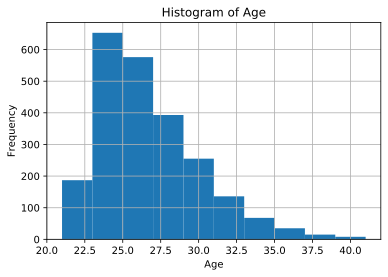

In [67]:
df_season_totals.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

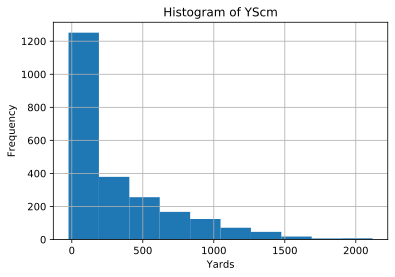

In [68]:
df_season_totals.YScm.hist()
plt.title('Histogram of YScm')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.savefig('Yard from Scrimmage')


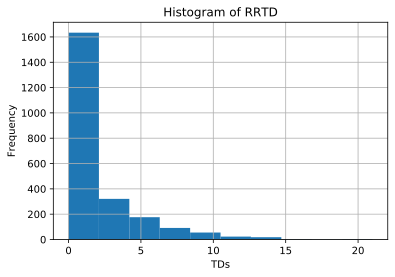

In [69]:
df_season_totals.RRTD.hist()
plt.title('Histogram of RRTD')
plt.xlabel('TDs')
plt.ylabel('Frequency')
plt.savefig('TDs')

In [71]:
pass

## MVP

### What what are the feature effects on #Touches that a player sees.

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [286]:
mask_probowlers = df_season_totals.pro_bowl == 1
mask_nonprobowlers = df_season_totals.pro_bowl == 0

In [287]:
df_probowlers = df_season_totals[mask_probowlers]
df_nonprobowlers = df_season_totals[mask_nonprobowlers]

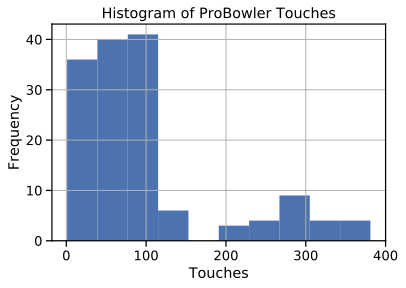

In [297]:
df_probowlers.Touch.hist()
plt.title('Histogram of ProBowler Touches')
plt.xlabel('Touches')
plt.ylabel('Frequency')
plt.savefig('PB_Touches')

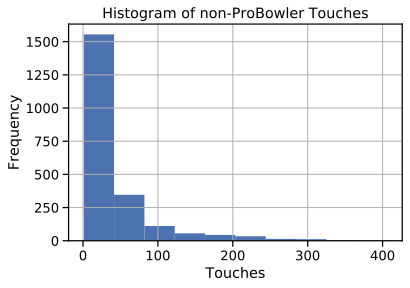

In [298]:
df_nonprobowlers.Touch.hist()
plt.title('Histogram of non-ProBowler Touches')
plt.xlabel('Touches')
plt.ylabel('Frequency')
plt.savefig('nPB_Touches')

In [301]:
#Average Touches of ProBowlers vs Non-ProBowlers
print(df_probowlers.Touch.mean(), df_nonprobowlers.Touch.mean())

98.73469387755102 38.867370353373104


In [73]:
covariates = ['RRTD', 'YScm', 'Fmb', 'Age', 'G']

In [74]:
pass


In [75]:
X, y = df_season_totals[covariates], df_season_totals['Touch']
print(X.shape, y.shape)

(2326, 5) (2326,)


In [76]:
# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=127)

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [78]:
# Create the model
model = sm.OLS(y_train, X_train)

# Fit the model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Touch   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              1648.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):                        0.00
Time:                        16:26:04   Log-Likelihood:                         -9053.7
No. Observations:                1860   AIC:                                  1.812e+04
Df Residuals:                    1855   BIC:                                  1.815e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RRTD           0.2268      0.478      0.474      0.635      -0.711       1.165
YScm           0.1320      0.004     35.290      0.000       0.125       0.139
Fmb            4.0276      0.381     10.577      0.000       3.281       4.774
Age            0.1112      0.067      1.662      0.097      -0.020       0.242
G             -0.6653      0.163     -4.072      0.000      -0.986      -0.345
==============================================================================
Omnibus:                      322.327   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1354.020
Skew:                           0.779   Prob(JB):                    9.51e-295
Kurtosis:                       6.878   Cond. No.                         326.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

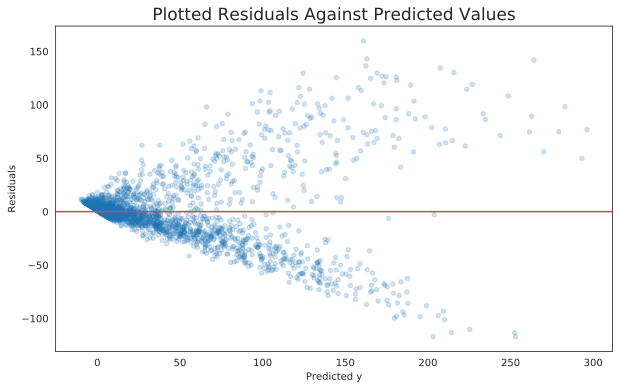

In [79]:
# Check for Heterosk
# Plot your predicted values on the x-axis, and your residuals on the y-axis

df_season_totals['predict']=fit.predict(X)
df_season_totals['resid']=y-df_season_totals.predict
with sns.axes_style('white'):
    plot=df_season_totals.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
    plot.set(xlabel='Predicted y', ylabel="Residuals")
    plt.rcParams["axes.labelsize"] = 15
    sns.set(font_scale = 1.2)
    plot.axes.set_title('Plotted Residuals Against Predicted Values',fontsize=17)
    plt.axhline(0, color='r')


## Let's clean up the heteroskedasticity

In [80]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [81]:
# Create the model
model_log_y = sm.OLS(y_train_log, X_train)

# Fit the model to your training set
fit_log_y = model_log_y.fit()

# Print summary statistics of the model's performance
fit_log_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Touch   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              4214.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):                        0.00
Time:                        16:26:07   Log-Likelihood:                         -2466.3
No. Observations:                1860   AIC:                                      4943.
Df Residuals:                    1855   BIC:                                      4970.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RRTD          -0.0176      0.014     -1.270      0.204      -0.045       0.010
YScm           0.0030      0.000     27.923      0.000       0.003       0.003
Fmb            0.1170      0.011     10.603      0.000       0.095       0.139
Age            0.0498      0.002     25.689      0.000       0.046       0.054
G              0.0388      0.005      8.193      0.000       0.029       0.048
==============================================================================
Omnibus:                       67.346   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.077
Skew:                          -0.486   Prob(JB):                     8.21e-17
Kurtosis:                       2.889   Cond. No.                         326.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
all_y_log = np.log(y)
print(X.shape, all_y_log.shape)

(2326, 5) (2326,)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


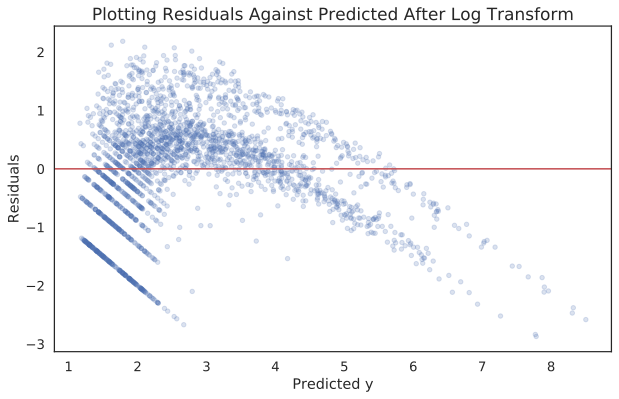

In [83]:
df_season_totals['predict_log_y'] = fit_log_y.predict(X)
df_season_totals['resid_log_y'] = all_y_log - df_season_totals.predict_log_y
with sns.axes_style('white'):
    plot = df_season_totals.plot(kind='scatter',
                  x='predict_log_y',y='resid_log_y',alpha=0.2,figsize=(10,6))
    plot.set(xlabel='Predicted y', ylabel="Residuals", title='Plotted Residuals Against Predicted Values')
    plt.rcParams["axes.labelsize"] = 15
    sns.set(font_scale = 1.2)
    plot.axes.set_title("Plotting Residuals Against Predicted After Log Transform",fontsize=17)
    plt.axhline(0, color='r')

In [84]:
df_season_totals.head()

Player            Pos  Touch  Y/Tch  YScm  RRTD  Fmb  \
0  Christian McCaffrey             RB    326    6.0  1965    13    4   
1           Cam Newton             QB    101    4.8   488     4    6   
2        C.J. Anderson             RB     25    5.1   128     1    0   
3  Cameron Artis-Payne  NO_POS_LISTED     22    3.8    84     1    0   
4           D.J. Moore             WR     68   14.1   960     2    4   

   pro_bowl  Age   G  GS     predict      resid  predict_log_y  resid_log_y  
0         0   22  16  16  270.158539  55.841461       7.898186    -2.111289  
1         0   29  14  14   83.379005  17.620995       4.094377     0.520743  
2         0   27   9   1   14.132238  10.867762       2.063107     1.155769  
3         0   28   9   0    8.437282  13.562718       1.979830     1.111212  
4         0   21  16  10  134.934208 -66.934208       5.002355    -0.782847

# Let's move on to Logit, and look at probowl




In [231]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

In [232]:
#get rid of the resids analysis from MVP
df_season_totals = df_season_totals.dropna(axis=1)
print(df_season_totals.shape)

(2326, 15)


In [233]:
df_season_totals.Pos.unique()

array(['RB', 'QB', 'NO_POS_LISTED', 'WR', 'FB/WR', 'TE', 'FB', 'P',
       'TE/WR', 'T', 'DT/LDT/RDT', 'CB/RCB', 'LCB/WR', 'DE', 'CB',
       'FS/SS', 'FB/RB/WR', 'RB/WR', 'FB/RB/TE', 'FS', 'C', 'DB',
       'DT/LDT', 'DB/S/SS', 'RB/TE', 'T/TE', 'FB/RB', 'LDT/RDT',
       'FB/TB/TE', 'P/TE', 'RG', 'FB/TE', 'K', 'K/WR', 'MLB', 'LT',
       'TB/TE', 'RT', 'NT', 'S', 'LB/RB', 'QB/WR', 'RB/TE/WR', 'SS',
       'RG/T', 'DT', 'LG', 'DE/NT', 'FB/TE/WR', 'S/SS'], dtype=object)

In [127]:
skill_mask = df_season_totals['Pos'].isin(['FB/TE/WR','TB/TE','RB', 'WR', 'FB/WR', 'TE', 'FB',
                                         'TE/WR', 'CB/RCB', 'LCB/WR', 'FB/RB/WR', 'RB/WR', 'FB/RB/TE', 
                                           'RB/TE', 'T/TE', 'FB/RB'])
skill_mask.value_counts()

True     1422
False     904
Name: Pos, dtype: int64

In [131]:
df_season_totals_skill = df_season_totals[skill_mask]
df_season_totals_skill.head()

Player    Pos  Touch  Y/Tch  YScm  RRTD  Fmb  pro_bowl  Age  \
0  Christian McCaffrey     RB    326    6.0  1965    13    4         0   22   
2        C.J. Anderson     RB     25    5.1   128     1    0         0   27   
4           D.J. Moore     WR     68   14.1   960     2    4         0   21   
6           Alex Armah  FB/WR     10    2.0    20     2    0         0   24   
7        Curtis Samuel     WR     47   12.3   578     7    1         0   22   

    G  GS     predict      resid  predict_log_y  resid_log_y  
0  16  16  270.158539  55.841461       7.898186    -2.111289  
2   9   1   14.132238  10.867762       2.063107     1.155769  
4  16  10  134.934208 -66.934208       5.002355    -0.782847  
6  16   2   -4.883204  14.883204       1.840950     0.461635  
7  13   8   75.684720 -28.684720       3.341638     0.508509

In [234]:
logit_covariates = ['RRTD', 'YScm', 'Fmb', 'Age', 'G', 'Touch']


In [235]:
X_logit, y_logit = df_season_totals[logit_covariates], df_season_totals.pro_bowl
print(X_logit.shape, y_logit.shape)




(2326, 6) (2326,)


In [236]:
#Test train split
X, X_logit_test, y, y_logit_test = train_test_split(X_logit, y_logit, test_size=.2, random_state=17)


In [237]:
X_logit_train, X_logit_val, y_logit_train, y_logit_val = train_test_split(X, y, test_size=.25, random_state=27)

In [238]:
#Sanity Check to make sure it split 60%
X_logit_train.shape[0]/X_logit.shape[0]



0.5997420464316423

In [239]:
#scale the Xs
scaler = StandardScaler()

X_logit_train_scaled = scaler.fit_transform(X_logit_train.values)
X_logit_val_scaled = scaler.fit_transform(X_logit_train.values)
X_logit_test_scaled = scaler.transform(X_logit_test.values)

In [240]:
# train accuracy
log_reg_tvt_split = LogisticRegression(C=1e9, solver='lbfgs')
log_reg_tvt_split.fit(X_logit_train, y_logit_train)




LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_logit_train_preds = log_reg_tvt_split.predict(X_logit_train)


In [242]:
metrics.accuracy_score(y_logit_train, y_logit_train_preds)


0.9326164874551971

In [243]:
print(metrics.classification_report(y_logit_train, y_logit_train_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1307
           1       0.35      0.08      0.13        88

    accuracy                           0.93      1395
   macro avg       0.65      0.53      0.55      1395
weighted avg       0.90      0.93      0.91      1395



In [244]:
import statsmodels.api as sm
logit_model=sm.Logit(y_logit_train,X_logit_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.200973
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.146     
Dependent Variable: pro_bowl         AIC:              572.7135  
Date:               2019-07-18 17:00 BIC:              604.1574  
No. Observations:   1395             Log-Likelihood:   -280.36   
Df Model:           5                LL-Null:          -328.34   
Df Residuals:       1389             LLR p-value:      3.7539e-19
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
RRTD       0.0759     0.0541    1.4034   0.1605   -0.0301    0.1820
YScm       0.0021     0.0005    3.8252   0.0001    0.0010 

## Looks like we have class imbalance...

### Let's weight the response variable

In [245]:
from sklearn import linear_model, svm, metrics, ensemble


In [246]:
def print_metrics(model,X_set,y_set):
  
    y_logit_pred = model.predict(X_set)

    print(metrics.classification_report(y_set, y_logit_pred))
    

### Regular logit model with very low regularization (on validation set)

In [251]:
X_logit_train.shape

(1395, 6)

In [252]:
logreg_weights = linear_model.LogisticRegression(C=1e9)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       439
           1       0.25      0.12      0.16        26

    accuracy                           0.93       465
   macro avg       0.60      0.55      0.56       465
weighted avg       0.91      0.93      0.92       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Logit with balance class weights

In [253]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e9)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)


              precision    recall  f1-score   support

           0       1.00      0.77      0.87       439
           1       0.20      1.00      0.34        26

    accuracy                           0.78       465
   macro avg       0.60      0.88      0.60       465
weighted avg       0.96      0.78      0.84       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [254]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e5)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       439
           1       0.20      1.00      0.34        26

    accuracy                           0.78       465
   macro avg       0.60      0.88      0.60       465
weighted avg       0.96      0.78      0.84       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [255]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=17)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       439
           1       0.21      1.00      0.34        26

    accuracy                           0.79       465
   macro avg       0.60      0.89      0.61       465
weighted avg       0.96      0.79      0.84       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [256]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e-3)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)


              precision    recall  f1-score   support

           0       0.98      0.73      0.84       439
           1       0.14      0.73      0.23        26

    accuracy                           0.73       465
   macro avg       0.56      0.73      0.54       465
weighted avg       0.93      0.73      0.80       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [273]:
class_w = {0:1, 1:9}
logreg_weights = linear_model.LogisticRegression(class_weight=class_w, C=17)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       0.99      0.83      0.91       439
           1       0.24      0.92      0.39        26

    accuracy                           0.84       465
   macro avg       0.62      0.88      0.65       465
weighted avg       0.95      0.84      0.88       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Looks like we get the best f1-scores for regularization set between ~15 to 1e5

In [ ]:
val_logit_model=sm.Logit(y_logit_train,X_logit_train)
result=logit_model.fit()
print(result.summary2())

## Time to YOLO the test set!!! 

In [304]:
class_w = {0:1, 1:9}

logreg_weights = linear_model.LogisticRegression(class_weight=class_w, C=17)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_test, y_logit_test)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       433
           1       0.29      0.70      0.41        33

    accuracy                           0.86       466
   macro avg       0.63      0.78      0.67       466
weighted avg       0.93      0.86      0.88       466



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [305]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=17)

logreg_weights_final = logreg_weights.fit(X_logit_train, y_logit_train)

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


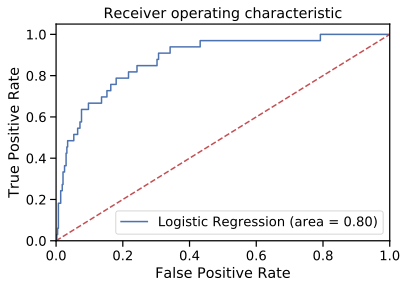

In [306]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_logit_test, logreg_weights_final.predict(X_logit_test))
fpr, tpr, thresholds = roc_curve(y_logit_test, logreg_weights_final.predict_proba(X_logit_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()